In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data

In [2]:
from matplotlib import pyplot as plt

In [3]:
from tensorflow import keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout

# Goal
- Recognize the type of clothing from a 28 by 28 pixel image
- Type of learning: Supervised.
- Type of task: Classification.
- Performance metric: Accuracy.
    - Other ideas: Precission, Recall, Confusion Matrix.

# Separate data

In [4]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
(Xtrain, ytrain), (Xtest, ytest) = load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Inspect Data

In [9]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape, 

((60000, 28, 28), (60000,), (10000, 784), (10000,))

In [6]:
LABELS = "t-shirt,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,boot".split()

([], [])

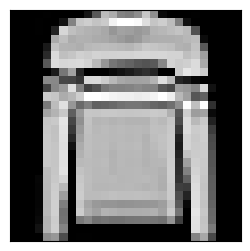

In [7]:
plt.figure(figsize=(3, 3))
plt.imshow(Xtrain[5], cmap="gray")
plt.xticks([])
plt.yticks([])

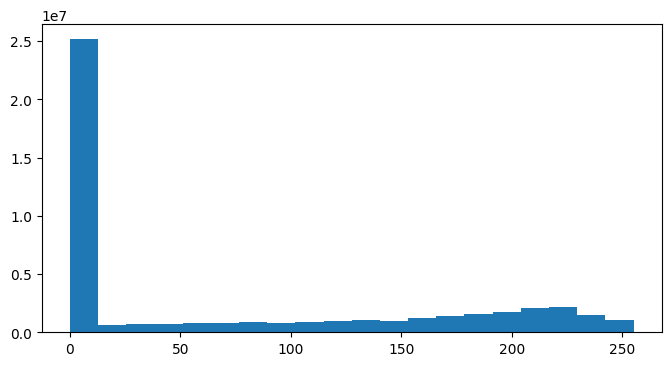

In [15]:
plt.figure(figsize=(8,4))
plt.hist(Xtrain.flatten(), bins=20)
None

# Preprocessing

In [17]:
X = Xtrain.reshape(60000, 28 * 28)[:1000]
Xtest = Xtest.reshape(10000, 28 * 28)
y = k.utils.to_categorical(ytrain[:1000])
X.shape, y.shape

((1000, 784), (1000, 10))

In [78]:
size = 20000
X8 = Xtrain.reshape(60000, 28 * 28)[:size]  # add more data here
Xtest8 = Xtest.reshape(10000, 28 * 28)
y8 = k.utils.to_categorical(ytrain[:size])  # and here
X8.shape, y8.shape

((20000, 784), (20000, 10))

In [36]:
# make normalized floats
X_float = X8 / 255.0
X_float.dtype

dtype('float64')

- TODO: Normalize
- TODO: Make floats

In [40]:
m = Sequential([
    k.Input(shape=(28 * 28,)), # DO NOT EDIT
    Dense(units=10, activation="sigmoid"), # Units are the neuronsfor this first layer. Can be edited. Other activations to try: 'relu', 'tanh', 'elu'?, 'leaky_relu'?
    Dense(units=10, activation="softmax"), # Units are the neurons for this second layer. Do not edit. Softmax: normalizes the output of the previous layer to a probability distribution
])
m.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) 
# adam is a gradient descent optimizer that automatically adjusts the learning rate
# The categorical crossentropy is the loss function for classification problems

In [24]:
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,882 (93.29 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,922 (62.20 KB)

- 7850 = 28 pixels * 28 pixels * 10 for every neuron + 10 bias parameters for every neuron
- 110 = 10 for every neuron * 10 inputs from the previous layer + 10 bias parameters for every neuron

In [ ]:
# The batch size is the number of samples that will be used in each iteration of the training
# The number of epochs is the number of times the model will see the entire dataset
# The validation split is the proportion of the dataset that will be used for validation
history = m.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7744 - loss: 0.6836 - val_accuracy: 0.7950 - val_loss: 0.6990
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7695 - loss: 0.7030 - val_accuracy: 0.7850 - val_loss: 0.6881
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.6186 - val_accuracy: 0.7100 - val_loss: 0.7887
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7415 - loss: 0.7699 - val_accuracy: 0.7250 - val_loss: 0.8440
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 0.9398 - val_accuracy: 0.7050 - val_loss: 0.9419
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7059 - loss: 0.9056 - val_accuracy: 0.6400 - val_loss: 1.0166
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6042 - loss: 1.0152 - val_accuracy: 0.6400 - val_loss: 0.9538
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6507 - loss: 0.9069 - val_accuracy: 0.6750 - val_loss:

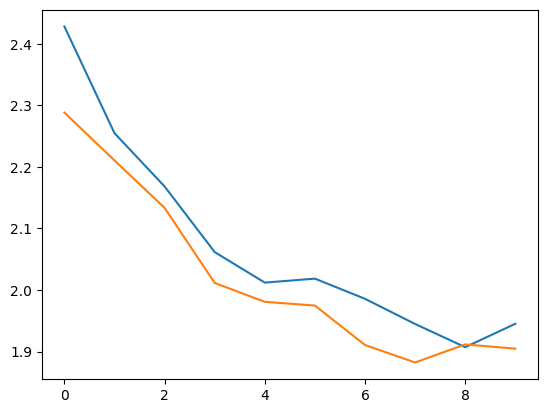

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [72]:
# Experiments

#
mRelu = Sequential([
    k.Input(shape=(28 * 28,)), # DO NOT EDIT
    Dense(units=20, activation="relu"), # Units are the neuronsfor this first layer. Can be edited. Other activations to try: 'relu', 'tanh', 'elu'?, 'leaky_relu'?
    Dense(units=10, activation="softmax"), # Units are the neurons for this second layer. Do not edit. Softmax: normalizes the output of the previous layer to a probability distribution
])
mRelu.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) 
# adam is a gradient descent optimizer that automatically adjusts the learning rate
# The categorical crossentropy is the loss function for classification problems

In [73]:
# The batch size is the number of samples that will be used in each iteration of the training
# The number of epochs is the number of times the model will see the entire dataset
# The validation split is the proportion of the dataset that will be used for validation
historyRelu = mRelu.fit(X_float, y8, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5237 - loss: 1.3837 - val_accuracy: 0.7725 - val_loss: 0.6678
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7986 - loss: 0.6086 - val_accuracy: 0.8025 - val_loss: 0.5891
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8181 - loss: 0.5333 - val_accuracy: 0.8130 - val_loss: 0.5329
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8389 - loss: 0.4778 - val_accuracy: 0.8285 - val_loss: 0.5048
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8379 - loss: 0.4533 - val_accuracy: 0.8230 - val_loss: 0.5197
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8568 - loss: 0.4261 - val_accuracy: 0.8370 - val_loss: 0.4756
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8482 - loss: 0.4293 - val_accuracy: 0.8365 - val_loss: 0.4704
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.8595 - loss: 0.4058 - va

(0.9101250171661377, 0.8500000238418579)

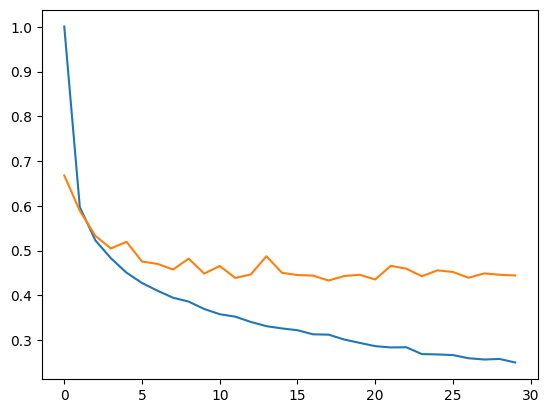

In [74]:
plt.plot(historyRelu.history["loss"])
plt.plot(historyRelu.history["val_loss"])

historyRelu.history["accuracy"][-1], historyRelu.history["val_accuracy"][-1]

# Overfitting example

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4735 - loss: 1.6033 - val_accuracy: 0.7325 - val_loss: 0.7206
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7600 - loss: 0.6597 - val_accuracy: 0.7830 - val_loss: 0.5947
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8141 - loss: 0.5176 - val_accuracy: 0.8110 - val_loss: 0.5303
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8465 - loss: 0.4584 - val_accuracy: 0.8270 - val_loss: 0.5004
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8477 - loss: 0.4408 - val_accuracy: 0.8190 - val_loss: 0.4928
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8513 - loss: 0.4090 - val_accuracy: 0.8340 - val_loss: 0.4578
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8693 - loss: 0.3750 - val_accuracy: 0.8270 - val_loss: 0.4787
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8776 - loss: 0.3574 - val_accuracy: 0.8355 - val_loss:

(0.9725000262260437, 0.8629999756813049)

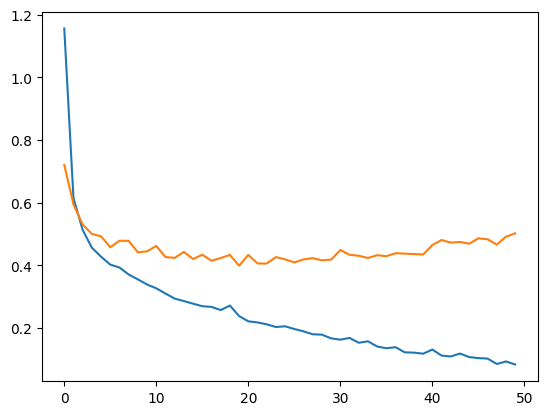

In [79]:
mOverfit = Sequential([
    k.Input(shape=(28 * 28,)), # DO NOT EDIT
    Dense(units=100, activation="relu"), # Units are the neuronsfor this first layer. Can be edited. Other activations to try: 'relu', 'tanh', 'elu'?, 'leaky_relu'?
    Dense(units=100, activation="relu"), # Units are the neuronsfor this first layer. Can be edited. Other activations to try: 'relu', 'tanh', 'elu'?, 'leaky_relu'?
    Dense(units=10, activation="softmax"), # Units are the neurons for this second layer. Do not edit. Softmax: normalizes the output of the previous layer to a probability distribution
])
mOverfit.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) 
# adam is a gradient descent optimizer that automatically adjusts the learning rate
# The categorical crossentropy is the loss function for classification problems

# The batch size is the number of samples that will be used in each iteration of the training
# The number of epochs is the number of times the model will see the entire dataset
# The validation split is the proportion of the dataset that will be used for validation
historyOverfit = mOverfit.fit(X_float, y8, batch_size=200, epochs=50, validation_split=0.2)

plt.plot(historyOverfit.history["loss"])
plt.plot(historyOverfit.history["val_loss"])

historyOverfit.history["accuracy"][-1], historyOverfit.history["val_accuracy"][-1]

In [88]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1853 - loss: 4.9795 - val_accuracy: 0.4650 - val_loss: 4.5021
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5107 - loss: 4.3578 - val_accuracy: 0.5900 - val_loss: 4.0224
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6088 - loss: 3.8856 - val_accuracy: 0.6100 - val_loss: 3.6086
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6500 - loss: 3.4890 - val_accuracy: 0.6650 - val_loss: 3.2760
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7177 - loss: 3.1465 - val_accuracy: 0.6950 - val_loss: 3.0276
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7542 - loss: 2.9349 - val_accuracy: 0.7150 - val_loss: 2.8386
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7352 - loss: 2.7533 - val_accuracy: 0.7100 - val_loss: 2.6630
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7847 - loss: 2.5648 - val_accuracy: 0.7300 - val_loss: 2.5210


(0.9312499761581421, 0.8629999756813049)

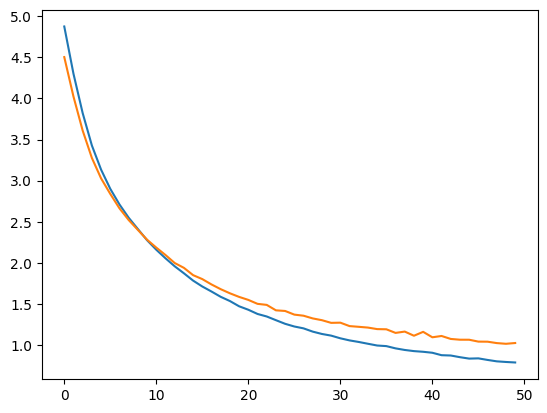

In [89]:
size = 1000
X8 = Xtrain.reshape(60000, 28 * 28)[:size]  # add more data here
Xtest8 = Xtest.reshape(10000, 28 * 28)
y8 = k.utils.to_categorical(ytrain[:size])  # and here
X8.shape, y8.shape

X_float = X8 / 255.0

mRegularised = Sequential([
    k.Input(shape=(28 * 28,)), # DO NOT EDIT
    Dense(units=100, activation="relu", kernel_regularizer=l2(0.01)), # Units are the neuronsfor this first layer. Can be edited. Other activations to try: 'relu', 'tanh', 'elu'?, 'leaky_relu'?
    Dense(units=100, activation="relu", kernel_regularizer=l2(0.01)), # Units are the neuronsfor this first layer. Can be edited. Other activations to try: 'relu', 'tanh', 'elu'?, 'leaky_relu'?
    Dense(units=10, activation="softmax"), # Units are the neurons for this second layer. Do not edit. Softmax: normalizes the output of the previous layer to a probability distribution
])
mRegularised.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]) 
# adam is a gradient descent optimizer that automatically adjusts the learning rate
# The categorical crossentropy is the loss function for classification problems

es = EarlyStopping(monitor='val_loss', patience=5)

# The batch size is the number of samples that will be used in each iteration of the training
# The number of epochs is the number of times the model will see the entire dataset
# The validation split is the proportion of the dataset that will be used for validation
historyRegularised = mRegularised.fit(X_float, y8, batch_size=200, epochs=50, validation_split=0.2, callbacks=[es])

plt.plot(historyRegularised.history["loss"])
plt.plot(historyRegularised.history["val_loss"])

historyRegularised.history["accuracy"][-1], historyOverfit.history["val_accuracy"][-1]

# Activation functions

